Implement and compare four types of Gradient Descent optimization algorithms for a multiple-feature dataset. The implemented algorithms should be:

1. Batch Gradient Descent (BGD)
2. Stochastic Gradient Descent (SGD)
3. Mini-Batch Gradient Descent (MBGD)
4. Momentum Gradient Descent (MGD)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
df = pd.read_csv("/content/drive/MyDrive/DEPI/Housing.csv")

In [16]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [18]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


##Note: The dataset has already been pre-processed, and all outliers have been handled.




In [5]:
# Step 1: Preprocess the data
# Scaling the 'area' feature
scaler = StandardScaler()
df['area'] = scaler.fit_transform(df[['area']])

In [6]:
df['mainroad'] = df['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
df['guestroom'] = df['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
df['basement'] = df['basement'].apply(lambda x: 1 if x == 'yes' else 0)
df['hotwaterheating'] = df['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
df['airconditioning'] = df['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
df['prefarea'] = df['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)
df['furnishingstatus'] = df['furnishingstatus'].apply(lambda x: 1 if x == 'furnished' else 0)

In [7]:
X = df.drop('price', axis=1).values
y = df['price'].values


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [9]:
# Add bias term (intercept) to the features
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

#Implementing Gradient Descent Optimizers

In [10]:

# Define the cost function (MSE)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# BGD implementation
def batch_gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        gradient = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# SGD implementation
def stochastic_gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        for i in range(m):
            gradient = X[i, :].T.dot(X[i, :].dot(theta) - y[i])
            theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# MBGD implementation
def mini_batch_gradient_descent(X, y, theta, alpha, batch_size, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        for i in range(0, m, batch_size):
            X_batch = X[i:i + batch_size, :]
            y_batch = y[i:i + batch_size]
            gradient = (1 / batch_size) * X_batch.T.dot(X_batch.dot(theta) - y_batch)
            theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# MGD implementation
def momentum_gradient_descent(X, y, theta, alpha, beta, iterations):
    m = len(y)
    v = np.zeros_like(theta)
    cost_history = []

    for _ in range(iterations):
        gradient = (1 / m) * X.T.dot(X.dot(theta) - y)
        v = beta * v + alpha * gradient
        theta -= v
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history


In [11]:
# Initialize parameters
theta_initial = np.zeros(X_train.shape[1])
alpha = 0.01  # learning rate
iterations = 150
batch_size = 32
beta = 0.9


#Training


In [12]:

# Batch Gradient Descent
theta_bgd, cost_bgd = batch_gradient_descent(X_train, y_train, theta_initial.copy(), alpha, iterations)

# Stochastic Gradient Descent
theta_sgd, cost_sgd = stochastic_gradient_descent(X_train, y_train, theta_initial.copy(), alpha, iterations)

# Mini-Batch Gradient Descent
theta_mbgd, cost_mbgd = mini_batch_gradient_descent(X_train, y_train, theta_initial.copy(), alpha, batch_size, iterations)

# Momentum Gradient Descent
theta_mgd, cost_mgd = momentum_gradient_descent(X_train, y_train, theta_initial.copy(), alpha, beta, iterations)


#Results

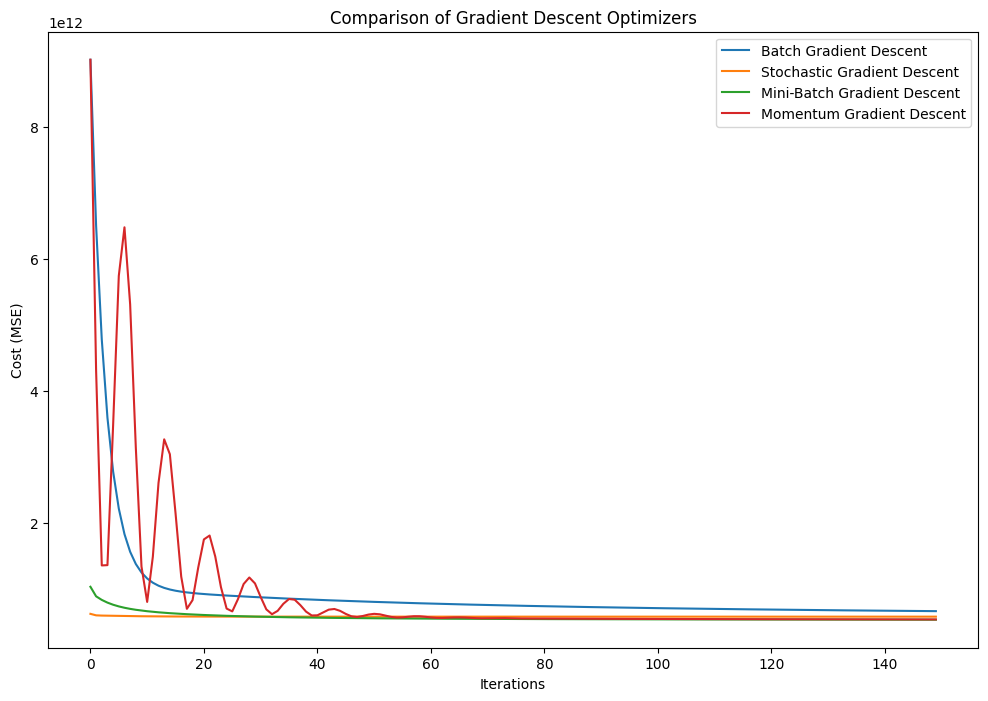

In [13]:

plt.figure(figsize=(12, 8))

plt.plot(cost_bgd, label='Batch Gradient Descent')
plt.plot(cost_sgd, label='Stochastic Gradient Descent')
plt.plot(cost_mbgd, label='Mini-Batch Gradient Descent')
plt.plot(cost_mgd, label='Momentum Gradient Descent')

plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Comparison of Gradient Descent Optimizers')
plt.legend()
plt.show()

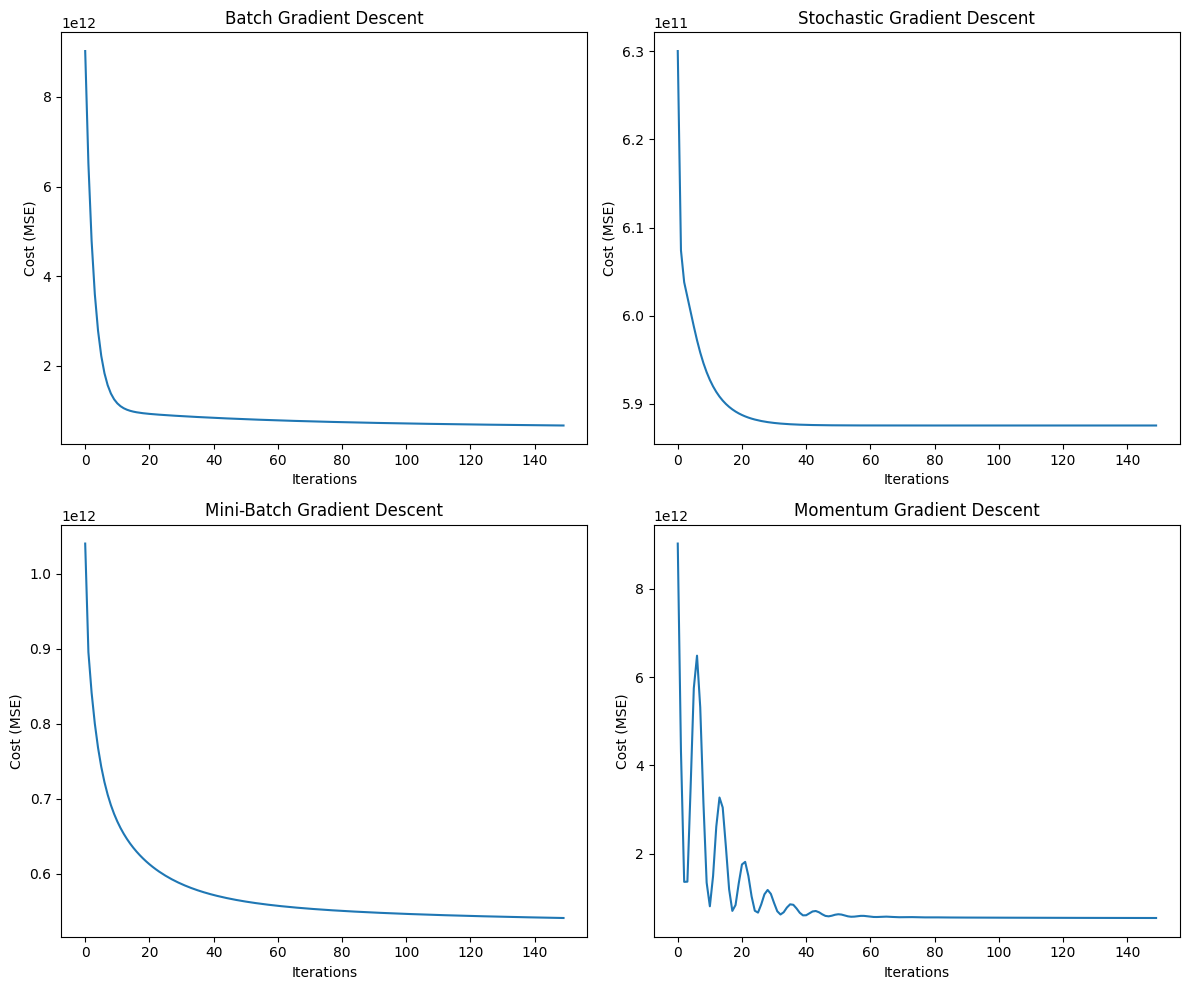

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# BGD Plot
axs[0, 0].plot(cost_bgd)
axs[0, 0].set_title('Batch Gradient Descent')
axs[0, 0].set_xlabel('Iterations')
axs[0, 0].set_ylabel('Cost (MSE)')

# SGD Plot
axs[0, 1].plot(cost_sgd)
axs[0, 1].set_title('Stochastic Gradient Descent')
axs[0, 1].set_xlabel('Iterations')
axs[0, 1].set_ylabel('Cost (MSE)')

# MBGD Plot
axs[1, 0].plot(cost_mbgd)
axs[1, 0].set_title('Mini-Batch Gradient Descent')
axs[1, 0].set_xlabel('Iterations')
axs[1, 0].set_ylabel('Cost (MSE)')

# MGD Plot
axs[1, 1].plot(cost_mgd)
axs[1, 1].set_title('Momentum Gradient Descent')
axs[1, 1].set_xlabel('Iterations')
axs[1, 1].set_ylabel('Cost (MSE)')

plt.tight_layout()
plt.show()

1. BGD is stable and works well with smaller datasets, but it may not be the fastest for large datasets due to the need to process the entire dataset at each iteration.
2. SGD is fast and can handle larger datasets better, but it can be noisy due to its reliance on individual data points for updates.
3. MBGD offers a compromise between the two, providing faster convergence without as much noise as SGD, making it ideal for larger datasets.
4. MGD helps overcome the slow convergence problem of BGD by introducing momentum. However, it may overshoot the minimum at first (hence the spike), but it usually converges faster once the momentum stabilizes.